In [1]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test,  y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32')/255. - 0.5
x_test = x_test.astype('float32')/255. -0.5
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
encoding_dim = 2
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [5]:
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

/Users/sean/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.
/Users/sean/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2313
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2313
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2313
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2313
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2313
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2313
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2313
Epoch 8/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2313
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2313
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2313
Epoch 11/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2313
Epoch 12/20
60000/60000 [===========================

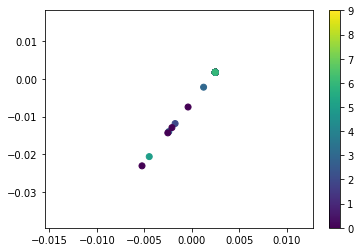

In [7]:
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoder_output)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_test)
plt.colorbar()
plt.show()